In [1]:
import nltk

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import pandas as pd
import string
import seaborn as sns

In [2]:
df = pd.read_csv("Datasets/MainCall.csv", sep=",", names=["label","message"])
df.head(100)

,label,message
0,fraud,"hello, i m bank manager of SBI, ur debit card ..."
1,fraud,Todays Vodafone numbers ending with 4882 are s...
2,normal,Please don't say like that. Hi hi hi
3,normal,Thank you!
4,normal,Oh that was a forwarded message. I thought you...
...,...,...
95,normal,Its a part of checking IQ.
96,normal,"Sorry my roommates took forever, it's ok if I ..."
97,normal,I plan to give on this month end.
98,normal,Wah lucky man... Then can save money... Hee...


# Data preprocessing

In [3]:
df.info(),df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5925 entries, 0 to 5924
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5925 non-null   object
 1   message  5925 non-null   object
dtypes: object(2)
memory usage: 92.7+ KB


(None, (5925, 2))

In [4]:
df.head(5)

,label,message
0,fraud,"hello, i m bank manager of SBI, ur debit card ..."
1,fraud,Todays Vodafone numbers ending with 4882 are s...
2,normal,Please don't say like that. Hi hi hi
3,normal,Thank you!
4,normal,Oh that was a forwarded message. I thought you...


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [6]:
# fraud=0 , normal=1
df['label'] = encoder.fit_transform(df['label'])
df.head(5)

,label,message
0,0,"hello, i m bank manager of SBI, ur debit card ..."
1,0,Todays Vodafone numbers ending with 4882 are s...
2,1,Please don't say like that. Hi hi hi
3,1,Thank you!
4,1,Oh that was a forwarded message. I thought you...


In [7]:
df.isnull().sum()

label      0
message    0
dtype: int64

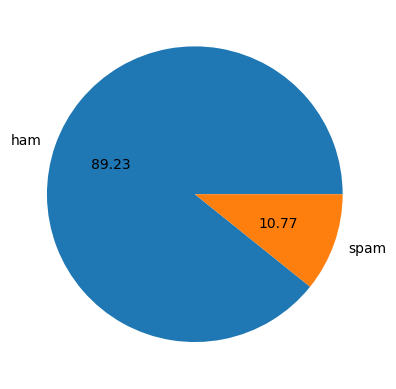

In [8]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

# TRANSFORMATION

In [9]:
# nltk.download("stopwords")

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\US\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# def transform_text(text):
#     text = text.lower()
#     text = nltk.word_tokenize(text)
    
#     y = []
#     for i in text:
#         if i.isalnum():
#             y.append(i)
    
#     text = y[:]
#     y.clear()
    
#     for i in text:
#         if i not in stopwords.words('english') and i not in string.punctuation:
#             y.append(i)
            
#     text = y[:]
#     y.clear()
    
#     for i in text:
#         y.append(ps.stem(i))
    
            
#     return " ".join(y)

In [12]:
# transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried eno")

In [13]:
class PreProcessText(object):
    def __init__(self):
        pass
    
    def remove_punctuation(self, text=''):
        """
        Takes a String 
        return : Return a String 
        """
        message = []
        for x in text:
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message = ''.join(message)
        
        return message
    
    def remove_stopwords(self, text=''):
        """
        Takes a String
        return List
        """
        words= []
        for x in text.split():
            if x.lower() in stopwords.words('english'):
                pass
            else:
                words.append(x)
        return words
    
    
    def token_words(self,text=''):
        """
        Takes String
        Return Token also called  list of words that is used to 
        Train the Model 
        """
        message = self.remove_punctuation(text)
        words = self.remove_stopwords(message)
        return words
        

In [14]:
text=PreProcessText()
text.token_words("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried eno")

['Im',
 'gonna',
 'home',
 'soon',
 'dont',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'Ive',
 'cried',
 'eno']

In [15]:
df['transformed_text']=df["message"].apply(text.token_words)

In [16]:
df['no_punctuation']=df["message"].apply(text.remove_punctuation)

In [17]:
df.head(15)

,label,message,transformed_text,no_punctuation
0,0,"hello, i m bank manager of SBI, ur debit card ...","[hello, bank, manager, SBI, ur, debit, card, e...",hello i m bank manager of SBI ur debit card is...
1,0,Todays Vodafone numbers ending with 4882 are s...,"[Todays, Vodafone, numbers, ending, 4882, sele...",Todays Vodafone numbers ending with 4882 are s...
2,1,Please don't say like that. Hi hi hi,"[Please, dont, say, like, Hi, hi, hi]",Please dont say like that Hi hi hi
3,1,Thank you!,[Thank],Thank you
4,1,Oh that was a forwarded message. I thought you...,"[Oh, forwarded, message, thought, send]",Oh that was a forwarded message I thought you ...
5,1,Got it. Seventeen pounds for seven hundred ml ...,"[Got, Seventeen, pounds, seven, hundred, ml, –...",Got it Seventeen pounds for seven hundred ml –...
6,1,Me and him so funny...,[funny],Me and him so funny
7,1,"Sweetheart, hope you are not having that kind ...","[Sweetheart, hope, kind, day, one, loads, reas...",Sweetheart hope you are not having that kind o...
8,1,When you login date time... Dad fetching you h...,"[login, date, time, Dad, fetching, home]",When you login date time Dad fetching you home...
9,1,"What will we do in the shower, baby?","[shower, baby]",What will we do in the shower baby


In [18]:
df["message"].dtype

dtype('O')

In [19]:
df["transformed_text"].head()

0    [hello, bank, manager, SBI, ur, debit, card, e...
1    [Todays, Vodafone, numbers, ending, 4882, sele...
2                [Please, dont, say, like, Hi, hi, hi]
3                                              [Thank]
4              [Oh, forwarded, message, thought, send]
Name: transformed_text, dtype: object

In [20]:
df["str_messages"]=df['transformed_text'].astype(str)
df["str_messages"].dtype

dtype('O')

In [21]:
# a=lambda x: str(x).split(',')
# df[''].apply(a)

In [22]:
df['label'].dtype

dtype('int32')

In [23]:
df.head(5)

,label,message,transformed_text,no_punctuation,str_messages
0,0,"hello, i m bank manager of SBI, ur debit card ...","[hello, bank, manager, SBI, ur, debit, card, e...",hello i m bank manager of SBI ur debit card is...,"['hello', 'bank', 'manager', 'SBI', 'ur', 'deb..."
1,0,Todays Vodafone numbers ending with 4882 are s...,"[Todays, Vodafone, numbers, ending, 4882, sele...",Todays Vodafone numbers ending with 4882 are s...,"['Todays', 'Vodafone', 'numbers', 'ending', '4..."
2,1,Please don't say like that. Hi hi hi,"[Please, dont, say, like, Hi, hi, hi]",Please dont say like that Hi hi hi,"['Please', 'dont', 'say', 'like', 'Hi', 'hi', ..."
3,1,Thank you!,[Thank],Thank you,['Thank']
4,1,Oh that was a forwarded message. I thought you...,"[Oh, forwarded, message, thought, send]",Oh that was a forwarded message I thought you ...,"['Oh', 'forwarded', 'message', 'thought', 'send']"


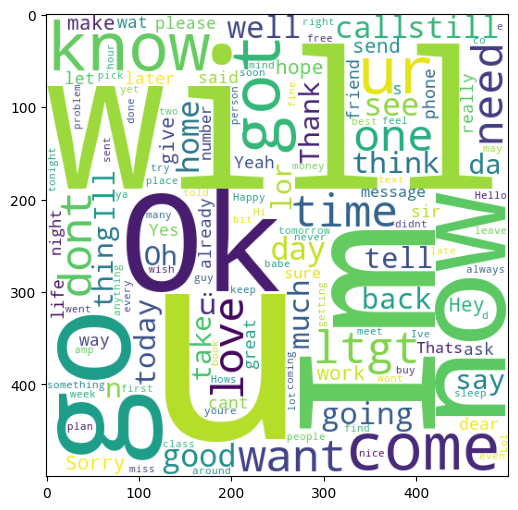

In [24]:
# normal call
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
ham_wc = wc.generate(df[df['label'] == 1]['no_punctuation'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

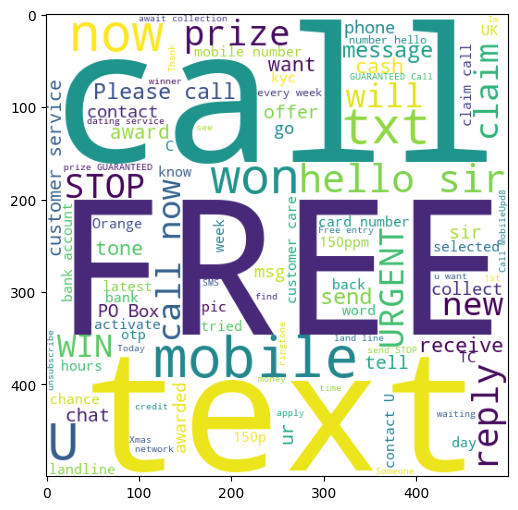

In [25]:
# scam call
scam_wc = wc.generate(df[df['label'] == 0]['no_punctuation'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(scam_wc)

In [26]:
spam_corpus = []
for msg in df[df['label'] == 0]['no_punctuation'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

14633

In [27]:
ham_corpus = []
for msg in df[df['label'] == 1]['no_punctuation'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

73615

# Model Building

In [28]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [29]:
X = tfidf.fit_transform(df['no_punctuation']).toarray()

In [30]:
X.shape

(5925, 3000)

In [31]:
y = df['label'].values

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [34]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8886075949367088
[[119  15]
 [117 934]]
0.9841938883034773


In [35]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729957805907173
[[ 102   32]
 [   0 1051]]
0.9704524469067405


In [36]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9856540084388186
[[ 120   14]
 [   3 1048]]
0.9868173258003766


In [37]:
import pickle

In [38]:
# pickle.dump(tfidf,open('vectorizer.pkl','wb'))
# pickle.dump(bnb,open('model.pkl','wb'))

In [39]:
# input
# input_message=("Your 2004 Account Statement for 07742676969 shows 786 unredeemed Bonus Points. To claim call 08719180248 Identifier Code: 45239 Expires")
# input_message=("Well i am definitely need to restock before thanksgiving, I'll let you know when I'm out")
# input_message=("Customer service annoncement. You have a New Years delivery waiting for you. Please call 07046744435 now to arrange delivery")
prediction_model=pickle.load(open('model.pkl','rb'))
input_message=("# Hello, I am calling from  GeoCustomerCare and your credit card is going to decline by tomorrow itself.")
# pre process
obj=PreProcessText()
transform_message=obj.remove_punctuation(input_message)
# vectorise
# bow_transformer = CountVectorizer(analyzer=obj.token_words).fit(transform_message)

vector_input=tfidf.transform([transform_message])
# tfidf_transformer.transform([transform_message])
# predict 
result=bnb.predict(vector_input)[0]
if result==0:
    print("scam")
else:
    print("no scam")


no scam


In [40]:
# hi i am going to a party tomorrow with vivek and his number is 9867465832